In [45]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('cardio_train.csv', sep=';')
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1


In [47]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
print(df.shape)

(70000, 13)


In [49]:
df.dtypes

id               int64
age              int64
gender           int64
height           int64
weight         float64
ap_hi            int64
ap_lo            int64
cholesterol      int64
gluc             int64
smoke            int64
alco             int64
active           int64
cardio           int64
dtype: object

In [50]:
df = df.drop('id', axis=1)

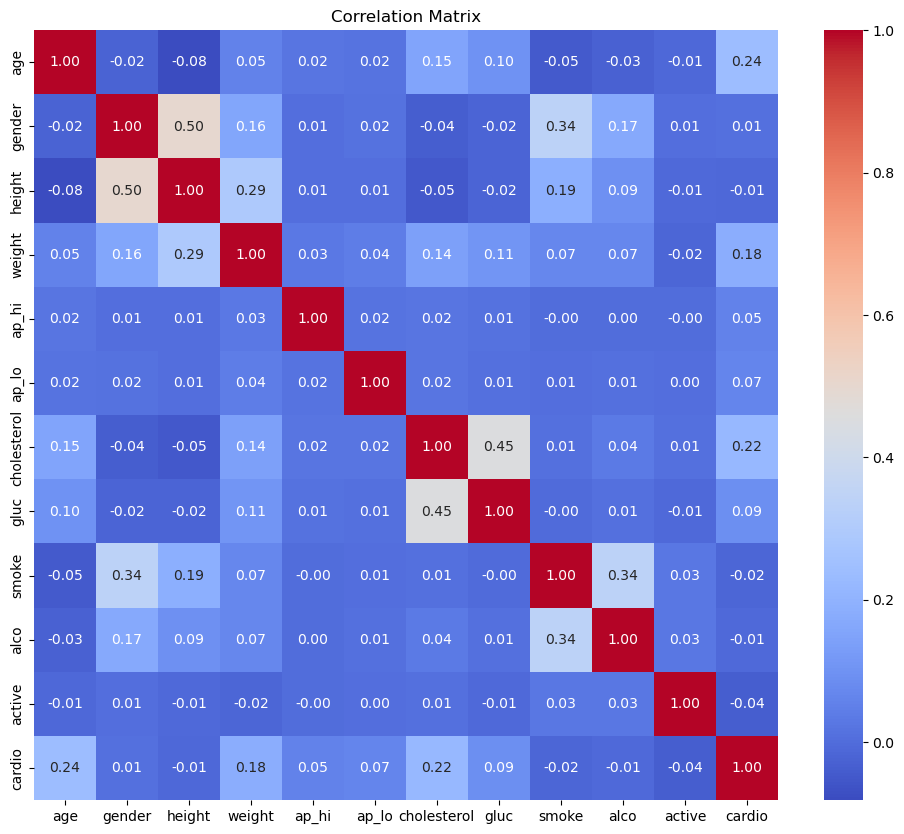

In [51]:
import seaborn as sns

import matplotlib.pyplot as plt
correlation_matrix = df.corr()
# Set the figure size for better visibility
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Set the title for the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [52]:
negative_ap_hi = df[df['ap_hi'] < 0]
negative_ap_lo = df[df['ap_lo'] < 0]

print("Rows with negative AP_HI:")
print(negative_ap_hi)

print("Rows with negative AP_LO:")
print(negative_ap_lo)

df = df[(df['ap_hi'] >= 0) & (df['ap_lo'] >= 0)]


Rows with negative AP_HI:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
4607   15281       1     165    78.0   -100     80            2     1      0   
16021  22108       2     161    90.0   -115     70            1     1      0   
20536  15581       1     153    54.0   -100     70            1     1      0   
23988  18301       1     162    74.0   -140     90            1     1      0   
25240  14711       2     168    50.0   -120     80            2     1      0   
35040  23325       2     168    59.0   -150     80            1     1      0   
46627  23646       2     160    59.0   -120     80            1     1      0   

       alco  active  cardio  
4607      0       1       0  
16021     0       1       0  
20536     0       1       0  
23988     0       1       1  
25240     0       0       1  
35040     0       1       1  
46627     0       0       0  
Rows with negative AP_LO:
         age  gender  height  weight  ap_hi  ap_lo  cholesterol  gl

In [53]:
df['age_years'] = df['age'] / 365.25

df['age_years'] = df['age_years'].round(1)
df = df.drop('age', axis=1)


In [54]:
df.isnull().sum()

gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
age_years      0
dtype: int64

In [55]:
df['BMI'] = df['weight'] / (df['height'] / 100) ** 2
df.describe()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,BMI
count,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000,69992.000000
mean,1.349554,164.359384,74.206485,128.843868,96.634601,1.366885,1.226483,0.088139,0.053778,0.803735,0.499700,53.302922,27.556764
std,0.476833,8.210423,14.395726,153.999302,188.482151,0.680272,0.572298,0.283498,0.225580,0.397174,0.500003,6.754676,6.091583
min,1.000000,55.000000,10.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.600000,3.471784
25%,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.400000,23.875115
50%,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.900000,26.374068
75%,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.400000,30.222222
max,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.900000,298.666667


In [56]:
bmi_min, bmi_max = 10, 50  

df = df[(df['BMI'] >= bmi_min) & (df['BMI'] <= bmi_max)]




In [57]:
ap_hi_min, ap_hi_max = 50, 200  
ap_lo_min, ap_lo_max = 30, 120  

df = df[(df['ap_hi'] >= ap_hi_min) & (df['ap_hi'] <= ap_hi_max)]
df = df[(df['ap_lo'] >= ap_lo_min) & (df['ap_lo'] <= ap_lo_max)]


In [58]:
df = df.drop(['height', 'weight'], axis=1)

In [59]:
df = pd.get_dummies(df, columns=['cholesterol', 'gluc'], prefix=['chol', 'gluc'])
df

,gender,ap_hi,ap_lo,smoke,alco,active,cardio,age_years,BMI,chol_1,chol_2,chol_3,gluc_1,gluc_2,gluc_3
0,2,110,80,0,0,1,0,50.4,21.967120,True,False,False,True,False,False
1,1,140,90,0,0,1,1,55.4,34.927679,False,False,True,True,False,False
2,1,130,70,0,0,0,1,51.6,23.507805,False,False,True,True,False,False
3,2,150,100,0,0,1,1,48.2,28.710479,True,False,False,True,False,False
4,1,100,60,0,0,0,0,47.8,23.011177,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,150,80,0,0,1,1,57.7,29.384757,True,False,False,True,False,False
69995,2,120,80,1,0,1,0,52.7,26.927438,True,False,False,True,False,False
69997,2,180,90,0,1,0,1,52.2,31.353579,False,False,True,True,False,False
69998,1,135,80,0,0,0,1,61.4,27.099251,True,False,False,False,True,False


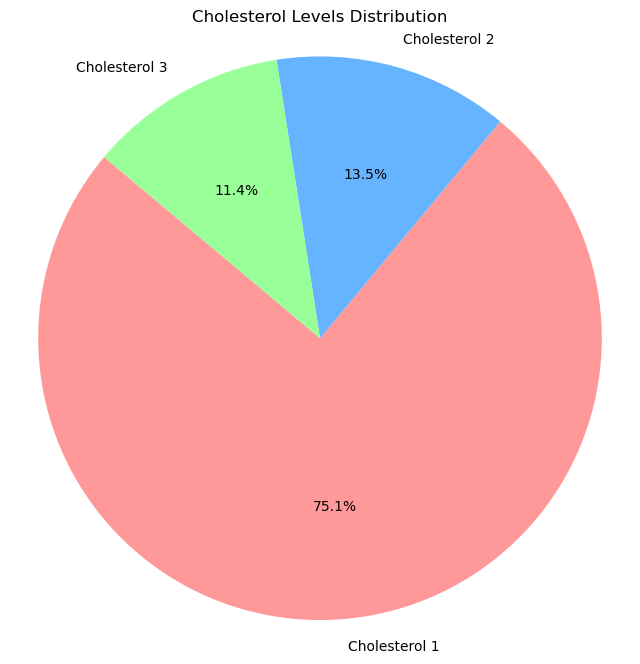

In [60]:
# Count the occurrences of each cholesterol level
cholesterol_counts = df[['chol_1', 'chol_2', 'chol_3']].sum()

# Define labels and sizes for the pie chart
labels = ['Cholesterol 1', 'Cholesterol 2', 'Cholesterol 3']
sizes = cholesterol_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Cholesterol Levels Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

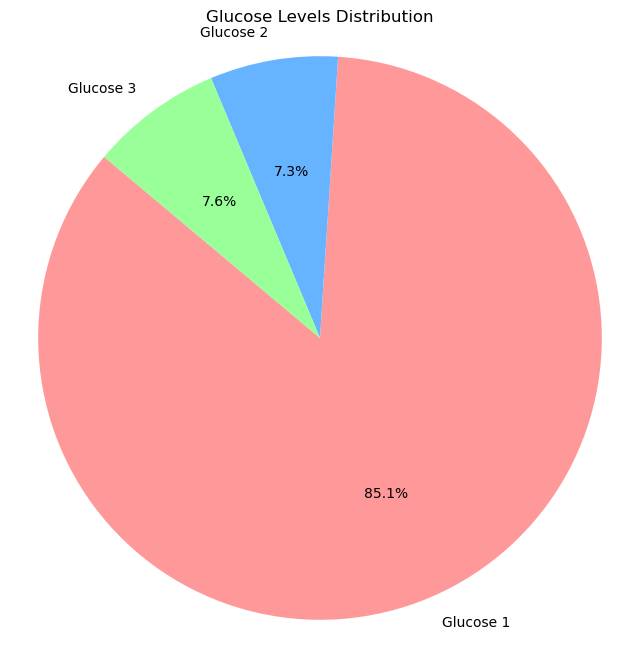

In [61]:
# Count the occurrences of each glucose level
glucose_counts = df[['gluc_1', 'gluc_2', 'gluc_3']].sum()

# Define labels and sizes for the pie chart
glucose_labels = ['Glucose 1', 'Glucose 2', 'Glucose 3']
glucose_sizes = glucose_counts.values

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(glucose_sizes, labels=glucose_labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Glucose Levels Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show the plot
plt.show()

In [62]:

# # Define the bins and labels for 3 categories
# bins = [0, 18.5, 24.9, 50]
# labels = ['Underweight', 'Normal weight', 'Overweight']

# # Create a new column 'BMI_category' with the binned data
# df['BMI_category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# # Perform One-Hot Encoding on the 'BMI_category' column
# df = pd.get_dummies(df, columns=['BMI_category'], prefix='BMI')

# # Display the first few rows to verify the binning
# df.head(3)

In [63]:
df['pulse_pressure'] = df['ap_hi'] - df['ap_lo']
df['mean_arterial_pressure'] = (df['ap_hi'] + 2 * df['ap_lo']) / 3




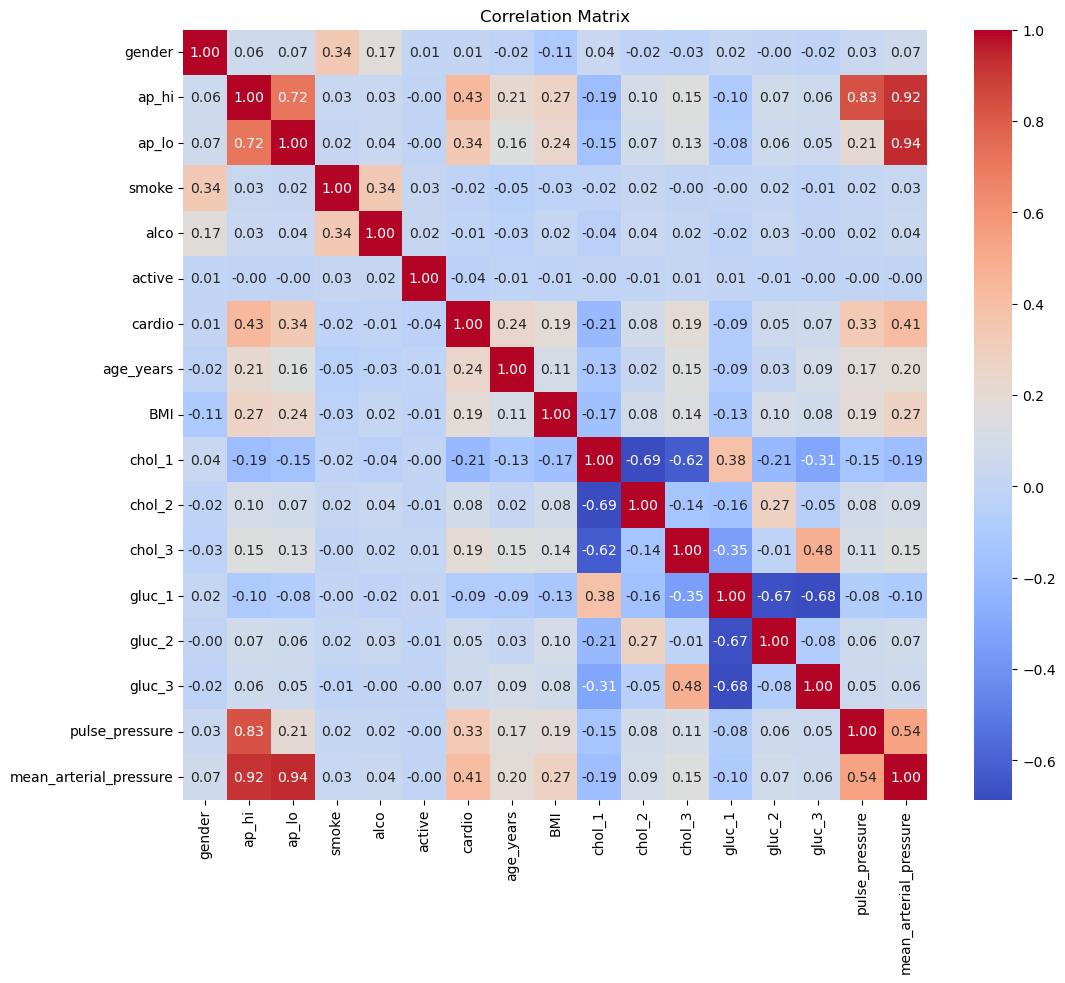

In [64]:
import seaborn as sns

import matplotlib.pyplot as plt
correlation_matrix = df.corr()
# Set the figure size for better visibility
plt.figure(figsize=(12, 10))

# Create a heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Set the title for the heatmap
plt.title('Correlation Matrix')

# Show the plot
plt.show()

In [65]:
# df = df.drop(['active', 'alco', 'smoke'], axis=1)
# df = df.drop(['active', 'alco', 'smoke'], axis=1)

In [66]:
df.dtypes

gender                      int64
ap_hi                       int64
ap_lo                       int64
smoke                       int64
alco                        int64
active                      int64
cardio                      int64
age_years                 float64
BMI                       float64
chol_1                       bool
chol_2                       bool
chol_3                       bool
gluc_1                       bool
gluc_2                       bool
gluc_3                       bool
pulse_pressure              int64
mean_arterial_pressure    float64
dtype: object

In [67]:
X = df.drop('cardio', axis=1)
feature_labels = X.columns
X = X.to_numpy()
y = df['cardio'].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train_scaled, y_train)
log_reg_y_pred = log_reg_model.predict(X_test_scaled)
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print("Logistic Regression Classification Report:")
print(classification_report(y_test, log_reg_y_pred))

Logistic Regression Accuracy: 0.7303
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.78      0.75     10523
           1       0.75      0.67      0.71      9999

    accuracy                           0.73     20522
   macro avg       0.73      0.73      0.73     20522
weighted avg       0.73      0.73      0.73     20522



In [70]:
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)
svm_y_pred = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("SVM Classification Report:")
print(classification_report(y_test, svm_y_pred))

SVM Accuracy: 0.7329
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.80      0.75     10523
           1       0.76      0.67      0.71      9999

    accuracy                           0.73     20522
   macro avg       0.74      0.73      0.73     20522
weighted avg       0.74      0.73      0.73     20522



In [71]:
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)
gb_y_pred = gb_model.predict(X_test_scaled)
gb_accuracy = accuracy_score(y_test, gb_y_pred)
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")
print("Gradient Boosting Classifier Classification Report:")
print(classification_report(y_test, gb_y_pred))

Gradient Boosting Classifier Accuracy: 0.7350
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     10523
           1       0.75      0.69      0.72      9999

    accuracy                           0.73     20522
   macro avg       0.74      0.73      0.73     20522
weighted avg       0.74      0.73      0.73     20522



In [40]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)
rf_y_pred = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_y_pred))

Random Forest Accuracy: 0.6965
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     10523
           1       0.69      0.69      0.69      9999

    accuracy                           0.70     20522
   macro avg       0.70      0.70      0.70     20522
weighted avg       0.70      0.70      0.70     20522



In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)
knn_y_pred = knn_model.predict(X_test_scaled)
knn_accuracy = accuracy_score(y_test, knn_y_pred)

print(f"KNN Accuracy: {knn_accuracy:.4f}")

print("KNN Classification Report:")
print(classification_report(y_test, knn_y_pred))

KNN Accuracy: 0.6959
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     10523
           1       0.69      0.69      0.69      9999

    accuracy                           0.70     20522
   macro avg       0.70      0.70      0.70     20522
weighted avg       0.70      0.70      0.70     20522



From all this model, I think Gradient Booster would be the best choice

In [72]:
# gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train_scaled, y_train)
# gb_y_pred = gb_model.predict(X_test_scaled)
# gb_accuracy = accuracy_score(y_test, gb_y_pred)
# print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")
# print("Gradient Boosting Classifier Classification Report:")
# print(classification_report(y_test, gb_y_pred))



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GradientBoostingClassifier with the best parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,        # Best learning rate
    max_depth=3,              # Best max depth
    n_estimators=100,         # Best number of estimators
    random_state=42           # Random seed for reproducibility
)

# Train the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
gb_y_pred = gb_model.predict(X_test_scaled)

# Calculate the accuracy
gb_accuracy = accuracy_score(y_test, gb_y_pred)

# Print the accuracy and classification report
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")
print("Gradient Boosting Classifier Classification Report:")
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print(classification_report(y_test, gb_y_pred))


Gradient Boosting Classifier Accuracy: 0.7350
Gradient Boosting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.78      0.75     10523
           1       0.75      0.69      0.72      9999

    accuracy                           0.73     20522
   macro avg       0.74      0.73      0.73     20522
weighted avg       0.74      0.73      0.73     20522



In [44]:
# from sklearn.model_selection import GridSearchCV

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5],
#     'min_samples_leaf': [1, 2]
# }

# # Initialize the model
# gb_model = GradientBoostingClassifier(random_state=42)

# # Define the parameter grid
# param_grid = {
#     'n_estimators': [50, 100],
#     'learning_rate': [0.01, 0.1],
#     'max_depth': [3, 5]
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train_scaled, y_train)

# # Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print(f"Best Parameters: {best_params}")
# print(f"Best Cross-Validation Score: {best_score:.4f}")

# # Train the model with the best parameters
# best_gb_model = grid_search.best_estimator_
# best_gb_model.fit(X_train_scaled, y_train)

# # Predict and evaluate the model
# best_gb_y_pred = best_gb_model.predict(X_test_scaled)
# best_gb_accuracy = accuracy_score(y_test, best_gb_y_pred)
# print(f"Best Gradient Boosting Accuracy: {best_gb_accuracy:.4f}")
# print("Best Gradient Boosting Classification Report:")
# print(classification_report(y_test, best_gb_y_pred))

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],  # Added an extra hyperparameter for better tuning
    'min_samples_leaf': [1, 2]
}

# Initialize the Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=gb_model,
    param_grid=param_grid,
    cv=3,               # 3-fold cross-validation
    n_jobs=-1,          # Use all available cores for parallel processing
    verbose=3           # Increased verbosity for detailed output
)

# Fit GridSearchCV to the training data
print("Starting Grid Search...")
grid_search.fit(X_train_scaled, y_train)

# Extract the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("\nGrid Search Complete!")
print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")

# Train the model with the best parameters
print("\nTraining the model with the best parameters...")
best_gb_model = grid_search.best_estimator_
best_gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
print("\nMaking predictions on the test set...")
best_gb_y_pred = best_gb_model.predict(X_test_scaled)

# Evaluate the model
best_gb_accuracy = accuracy_score(y_test, best_gb_y_pred)
print(f"\nTest Set Accuracy: {best_gb_accuracy:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, best_gb_y_pred))


Starting Grid Search...
Fitting 3 folds for each of 32 candidates, totalling 96 fits


KeyboardInterrupt: 

Based on the best Params, ill update my model with it

In [114]:
# gb_model = GradientBoostingClassifier(random_state=42)
# gb_model.fit(X_train_scaled, y_train)
# gb_y_pred = gb_model.predict(X_test_scaled)
# gb_accuracy = accuracy_score(y_test, gb_y_pred)
# print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")
# print("Gradient Boosting Classifier Classification Report:")
# print(classification_report(y_test, gb_y_pred))



from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize the GradientBoostingClassifier with the best parameters
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,        # Best learning rate
    max_depth=3,              # Best max depth
    n_estimators=100,         # Best number of estimators
    random_state=42           # Random seed for reproducibility
)

# Train the model on the scaled training data
gb_model.fit(X_train_scaled, y_train)

# Predict on the scaled test data
gb_y_pred = gb_model.predict(X_test_scaled)

# Calculate the accuracy
gb_accuracy = accuracy_score(y_test, gb_y_pred)

# Print the accuracy and classification report
print(f"Gradient Boosting Classifier Accuracy: {gb_accuracy:.4f}")
print("Gradient Boosting Classifier Classification Report:")
joblib.dump(gb_model, 'gradient_boosting_model.pkl')
print(classification_report(y_test, gb_y_pred))


KNN Accuracy: 0.6938
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.70      0.70     10523
           1       0.69      0.68      0.68      9999

    accuracy                           0.69     20522
   macro avg       0.69      0.69      0.69     20522
weighted avg       0.69      0.69      0.69     20522



Fitting 3 folds for each of 70 candidates, totalling 210 fits


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150}
Best Cross-Validation Score for Random Forest: 0.7309
Fitting 5 folds for each of 144 candidates, totalling 720 fits


KeyboardInterrupt: 

In [120]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Slightly increased parameter grid for Random Forest
# param_grid_rf = {
#     'n_estimators': [50, 100, 150, 200],  # Added 200 for more options
#     'max_depth': [None, 10, 20, 30],  # Added 30 for deeper trees
#     'min_samples_split': [2, 5, 10],  # Added 10 for more conservative splits
#     'min_samples_leaf': [1, 2, 4]  # Added 4 for more conservative leaf sizes
# }

# # Initialize the RandomForestClassifier
# rf_model = RandomForestClassifier(random_state=42)

# # Initialize GridSearchCV with the expanded parameter grid and 3-fold cross-validation
# grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=3, n_jobs=-1, verbose=2)

# # Fit GridSearchCV
# grid_search_rf.fit(X_train_scaled, y_train)

# # Get the best parameters and best score
# best_params_rf = grid_search_rf.best_params_
# best_score_rf = grid_search_rf.best_score_

# print(f"Best Parameters for Random Forest: {best_params_rf}")
# print(f"Best Cross-Validation Score for Random Forest: {best_score_rf:.4f}")

# # Train the model with the best parameters
# best_rf_model = grid_search_rf.best_estimator_
# best_rf_model.fit(X_train_scaled, y_train)


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-Validation Score for Random Forest: 0.7315


RandomForestClassifier(max_depth=10, min_samples_leaf=4, n_estimators=200,
                       random_state=42)

Random Forest Accuracy: 0.6897
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.69      0.70     10523
           1       0.68      0.69      0.68      9999

    accuracy                           0.69     20522
   macro avg       0.69      0.69      0.69     20522
weighted avg       0.69      0.69      0.69     20522

